Iris Flower Classification Model by Armi

In [5]:
#import our necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load dataset
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()
df.describe()
df.info()
df['species'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

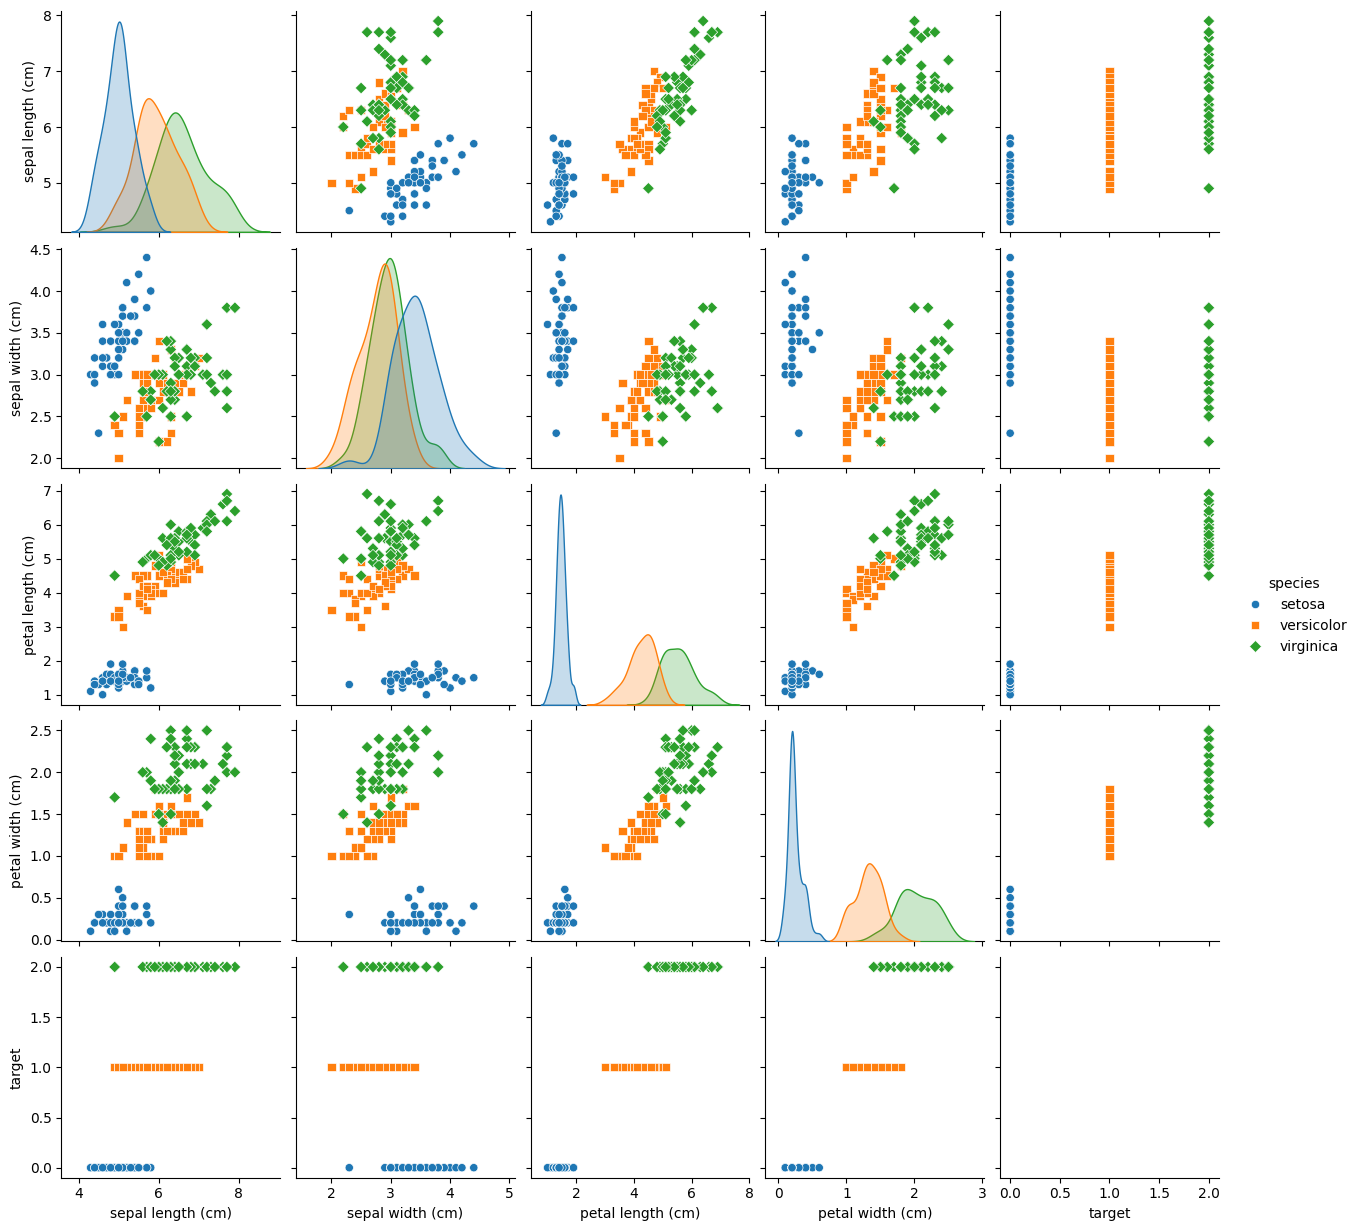

In [7]:
#EDA
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

In [8]:
x = df[iris.feature_names]
y = df['target']

#split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
#Train a simple model. Lets use Logistic Regression, Then we try Decision Tree, Random Forest, and KNeighbors
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
#Try with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
#WIth Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
#With KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) #or you can use any number of neighbors, some people use 3, some use 7
knn.fit(x_train, y_train)

KNeighborsClassifier()

Evaluate the Models

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Logistic Regression 
y_pred = model.predict(x_test)

#Decision Tree
y_pred_tree = tree.predict(x_test)

#Random Forest
y_pred_rf = rf.predict(x_test)

#KNeighbors
y_pred_KNN = knn.predict(x_test)

#Logistic Regression EValuation
print("L Regression Results: ")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))


L Regression Results: 
Accuracy:  0.9666666666666667

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [18]:
#Decision Tree Evaluation
print("Decision Tree Result: ")
print("Tree Accuracy: ", tree.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred_tree))
print("\n")


Decision Tree Result: 
Tree Accuracy:  0.9333333333333333

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix: 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]




In [19]:
#Random Forest Evaluation
print("Random Forest Results: ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Results: 
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


In [20]:
#KNN Evaluation
print("KNN Results: ")
print("Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("\nClassification Report:\n", classification_report(y_test, y_pred_KNN))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_KNN))

KNN Results: 
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


Lets Save The Models

In [21]:
import joblib
#random forest model
joblib.dump(rf, 'iris_classifier_rf.pkl')
#decision tree model
joblib.dump(tree, 'iris_classifier_tree.pkl')
#KNeighbors model
joblib.dump(knn, 'iris_classifier_knn.pkl')
#logistic regression model
joblib.dump(model, 'iris_classifier_logistic.pkl')

['iris_classifier_logistic.pkl']

Test the Models

In [22]:
#Since Randome Forest and KNeighbors had the highest accuracy, we can use them for testing
import numpy as np

# Load Random Forest model
loaded_rf = joblib.load("iris_classifier_rf.pkl")

# Load KNN model
loaded_knn = joblib.load("iris_classifier_knn.pkl")

# Flower Example for prediction
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])

# Predict with Random Forest
prediction_rf = loaded_rf.predict(new_flower)
print("Random Forest Prediction:", iris.target_names[prediction_rf][0])

# Predict with KNN
prediction_knn = loaded_knn.predict(new_flower)
print("KNN Prediction:", iris.target_names[prediction_knn][0])


Random Forest Prediction: setosa
KNN Prediction: setosa


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
